In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from functools import partial

import sys
sys.path.append('../')

from data_processing import butterfly1_pts, butterfly2_pts

butterfly1 = jnp.array(butterfly1_pts())
butterfly2 = jnp.array(butterfly2_pts())
print(butterfly1.shape, butterfly2.shape)

(2, 223320) (2, 57000)


In [3]:
def fourier_decompose(xs, num_truncation=None):
    xs_fft = jax.vmap(jnp.fft.rfft)(xs)
    if num_truncation is None:
        num_truncation = xs.shape[1]
    xs_coeffs = xs_fft[:, :num_truncation]
    return xs_coeffs

def fourier_compose(xs_coeffs, num_samples):
    xs_recon = jax.vmap(partial(jnp.fft.irfft, n=num_samples))(xs_coeffs)
    return xs_recon

(2, 224)
complex64
(2, 224)


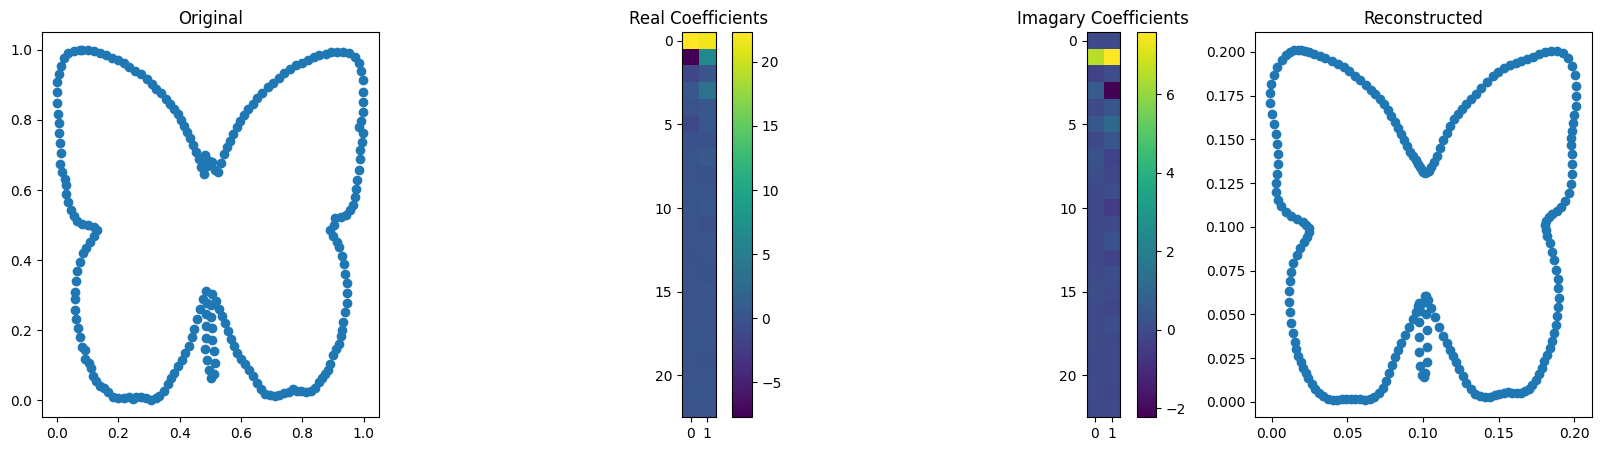

In [8]:
s1 = butterfly1[:, ::1000]
print(s1.shape)

num_truncation = 32
s1_coeffs = fourier_decompose(s1[:, ::5], num_truncation)
print(s1_coeffs.dtype)
s1_recon = fourier_compose(s1_coeffs, s1.shape[1])
print(s1_recon.shape)

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.scatter(s1[0, :], s1[1, :])
plt.title('Original')
plt.subplot(1, 4, 2)
plt.imshow(s1_coeffs.real.T)
plt.title('Real Coefficients')
plt.colorbar()
plt.subplot(1, 4, 3)
plt.imshow(s1_coeffs.imag.T)
plt.title('Imagary Coefficients')
plt.colorbar()
plt.subplot(1, 4, 4)
plt.scatter(s1_recon[0, :], s1_recon[1, :])
plt.title('Reconstructed')
plt.show()

(2, 114)
(2, 456)


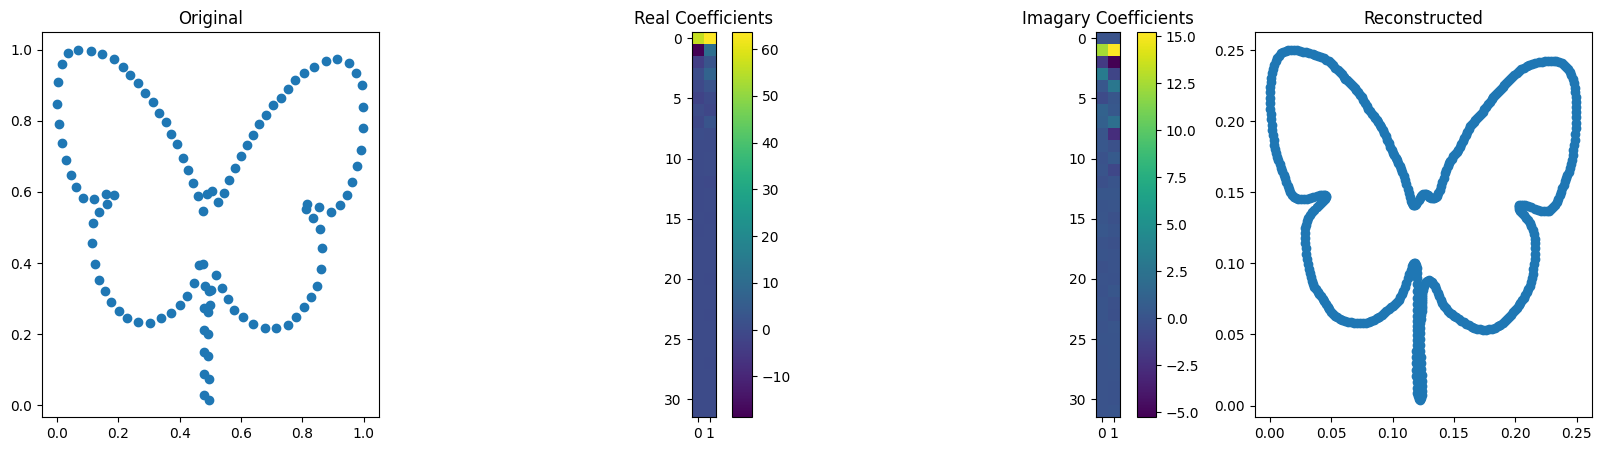

In [10]:
s2 = butterfly2[:, ::500]
print(s2.shape)

num_truncation = 32
s2_coeffs = fourier_decompose(s2, num_truncation)
s2_recon = fourier_compose(s2_coeffs, 4*s2.shape[1])
print(s2_recon.shape)

plt.figure(figsize=(20, 5))
plt.subplot(1, 4, 1)
plt.scatter(s2[0, :], s2[1, :])
plt.title('Original')
plt.subplot(1, 4, 2)
plt.imshow(s2_coeffs.real.T)
plt.title('Real Coefficients')
plt.colorbar()
plt.subplot(1, 4, 3)
plt.imshow(s2_coeffs.imag.T)
plt.title('Imagary Coefficients')
plt.colorbar()
plt.subplot(1, 4, 4)
plt.scatter(s2_recon[0, :], s2_recon[1, :])
plt.title('Reconstructed')
plt.show()